In [1]:
import glob
import hydra
from hydra import compose, initialize
import numpy as np
import pandas as pd
import torch
import yaml
from omegaconf import DictConfig, OmegaConf
from dl4cv.utils.utils import set_seed
from dl4cv.lightning_classes.plmodel import LitCVModel
from dl4cv.datasets import build_ph2, build_drive
from dl4cv.datasets.taco_data import build_taco
from tqdm import tqdm
import os
from importlib import reload
import matplotlib.pyplot as plt


In [2]:
from dl4cv.utils.utils import set_seed

In [3]:
hydra.core.global_hydra.GlobalHydra.instance().clear()

In [4]:
initialize(config_path="../dl4cv/configs")
cfg = compose(config_name="config_taco_training.yaml")


In [80]:
%load_ext autoreload
%autoreload 2
train,val,test = build_taco(cfg)
#loader = torch.utils.data.DataLoader(
    #train,
    #batch_size=6,
    #num_workers=1,
    #shuffle=False,
#)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
loading annotations into memory...
Done (t=0.05s)
creating index...
index created!


In [77]:
import matplotlib.patches as patches

In [82]:
print("test_len",len(train),"val_len",len(val),"test_len",len(test))

test_len 257 val_len 32 test_len 33


In [83]:
data_poing = train[0]

5
{'id': 2626, 'image_id': 849, 'category_id': 5, 'segmentation': [[972.0, 1248.0, 967.0, 1300.0, 955.0, 1339.0, 943.0, 1363.0, 947.0, 1384.0, 962.0, 1395.0, 981.0, 1417.0, 988.0, 1430.0, 1018.0, 1438.0, 1038.0, 1438.0, 1055.0, 1430.0, 1065.0, 1421.0, 1071.0, 1412.0, 1072.0, 1376.0, 1072.0, 1347.0, 1068.0, 1329.0, 1068.0, 1320.0, 1072.0, 1311.0, 1074.0, 1291.0, 1075.0, 1264.0, 1071.0, 1248.0, 1068.0, 1243.0, 1063.0, 1227.0, 1055.0, 1218.0, 1052.0, 1211.0, 1049.0, 1196.0, 1036.0, 1187.0, 1019.0, 1186.0, 1007.0, 1193.0, 1002.0, 1205.0, 1002.0, 1211.0, 987.0, 1219.0, 981.0, 1230.0, 978.0, 1237.0, 972.0, 1248.0]], 'area': 24068.5, 'bbox': [943.0, 1186.0, 132.0, 252.0], 'iscrowd': 0}


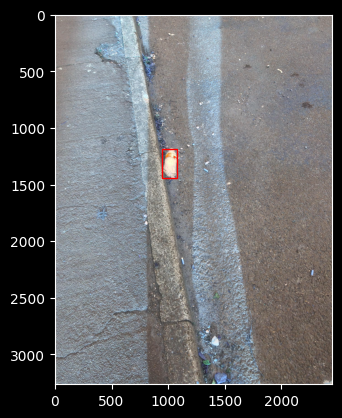

In [84]:
fig,ax =plt.subplots()
[x,y,h,w] = data_poing[1]

ax.imshow(data_poing[0])
rect = patches.Rectangle((x, y), h, w, linewidth=1, edgecolor='r', facecolor='none')
ax.add_patch(rect)

In [ ]:
ss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()
ss.setBaseImage(train[0])

In [ ]:
batch = next(iter(loader))
print(f'Inputs shape: {batch[0].shape}')
print(f'Tagets shape: {batch[1].shape}')

In [ ]:
cfg.datamodule.params.split[0] = 14
cfg.datamodule.params.split[1] = 3
cfg.datamodule.params.path = '/dtu/datasets1/02514/DRIVE'

In [ ]:
train,val,test = build_drive(cfg)
loader = torch.utils.data.DataLoader(
    train,
    batch_size=6,
    num_workers=1,
    shuffle=False,
)

In [ ]:
batch = next(iter(loader))
print(f'Inputs shape: {batch[0].shape}')
print(f'Tagets shape: {batch[1].shape}')